## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

##### Será instaciada a rede e definida a topologia de Grade

2024-06-30 21:30:26,876: Qubit 0 adicionado à memória do Host 0.
2024-06-30 21:30:26,877: Qubit 0 criado com fidelidade inicial 0.7702326281345594 e adicionado à memória do Host 0.
2024-06-30 21:30:26,877: Qubit 1 adicionado à memória do Host 0.
2024-06-30 21:30:26,878: Qubit 1 criado com fidelidade inicial 0.31048660067003175 e adicionado à memória do Host 0.
2024-06-30 21:30:26,878: Qubit 2 adicionado à memória do Host 0.
2024-06-30 21:30:26,879: Qubit 2 criado com fidelidade inicial 0.983426802993647 e adicionado à memória do Host 0.
2024-06-30 21:30:26,880: Qubit 3 adicionado à memória do Host 0.
2024-06-30 21:30:26,881: Qubit 3 criado com fidelidade inicial 0.3334155701581115 e adicionado à memória do Host 0.
2024-06-30 21:30:26,882: Qubit 4 adicionado à memória do Host 0.
2024-06-30 21:30:26,882: Qubit 4 criado com fidelidade inicial 0.6317692445117444 e adicionado à memória do Host 0.
2024-06-30 21:30:26,883: Qubit 5 adicionado à memória do Host 0.
2024-06-30 21:30:26,883: Qubit

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


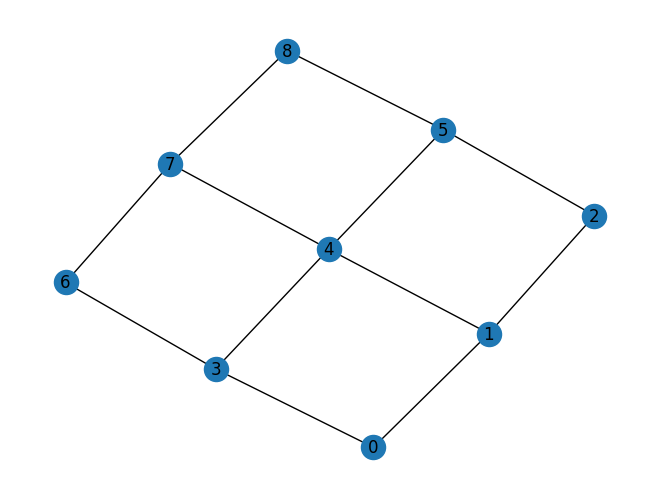

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-06-30 21:30:27,817: Qubit 1 adicionado à memória do Host 2.
2024-06-30 21:30:27,818: Qubit 2 adicionado à memória do Host 5.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x000001F338FB4D90>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB5050>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB4310>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB5190>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB6B10>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB0110>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB7510>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB7D90>, <quantumnet.objects.qubit.Qubit object at 0x000001F33896DC90>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FB6DD0>, <quantumnet.objects.qubit.Qubit object at 0x000001F3493904D0>]
[<quantumnet.objects.qubit.Qubit object at 0x000001F338FB1C90>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FC1B90>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FC2E90>, <quantumnet.objects.qubit.Qubit object at 0x000001F338FC26D0>, <quantumnet.objects.qubit.Qubit object at 0x000001F33

##### Obtendo o útimo qubit de um dos hosts

In [6]:
qub1 = alice.get_last_qubit()


##### Medindo a fidelidade entre dois qubits


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-06-30 21:30:27,843: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 0.1437343776946986


0.1437343776946986

##### Medindo a fidelidade de um qubit


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-06-30 21:30:27,856: A fidelidade do qubit Qubit 1 with state None é 0.16284071317863757


0.16284071317863757

##### Criação do protocolo de entrelaçamento entre dois qubits

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-06-30 21:30:29,520: A fidelidade entre o qubit Qubit 29 with state None e o qubit Qubit 2 with state None é 0.6080625459904119
2024-06-30 21:30:29,521: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP

In [10]:
rede.physical.echp_on_demand(2,5)

2024-06-30 21:30:29,530: A fidelidade do qubit Qubit 28 with state None é 0.7818331578485727
2024-06-30 21:30:29,530: A fidelidade do qubit Qubit 59 with state None é 0.5859046090719624
2024-06-30 21:30:29,531: A probabilidade de sucesso do ECHP falhou.


False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP

In [11]:
rede.physical.echp_on_replay(2,5)

2024-06-30 21:30:29,543: A fidelidade do qubit Qubit 27 with state None é 0.46047115096293134
2024-06-30 21:30:29,544: A fidelidade do qubit Qubit 58 with state None é 0.8205027101805343
2024-06-30 21:30:29,545: A probabilidade de sucesso do ECHP falhou.


False

##### Acessando o canal que mostra as probablidades e os pares eprs


In [12]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.6566823719392578,
 'prob_replay_epr_create': 0.5983244229264157,
 'eprs': [<quantumnet.objects.epr.Epr at 0x1f338fcb510>,
  <quantumnet.objects.epr.Epr at 0x1f338fe01d0>]}

##### Acessando o dicionario que contém os pares eprs alocados


In [13]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x1f338fd7650>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x1f338fc0750>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x1f338fe0550>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x1f338fe2090>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x1f338fcb510>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x1f338fe3b50>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x1f338fdcc90>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x1f338fddf10>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x1f338fb7e10>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x1f338fdee90>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x1f338fb1050>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x1f338fca1d0>,
  <quantumnet.objects.epr.Epr at 0x1f338fdfc10>]}